# Problem Statement 02 : Student Stress

In [1]:
# importing libraries 
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  


In [7]:
# importing dataset
stress = pd.read_csv("E:\\mygit\\ibm\\student stress\\StressLevelDataset.csv")
df = pd.DataFrame(stress)


In [8]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [22]:
# Display statistical summary of numerical columns
df.describe()


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [12]:
df.shape

(1100, 21)

In [31]:
# Extracting columns based on different factor categories
psychological_factors = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Create a new DataFrame with columns representing factor categories
factors_superset = pd.DataFrame()

# Summing up each factor category to create columns for each category in the superset DataFrame
factors_superset['Psychological'] = df[psychological_factors].sum(axis=1)
factors_superset['Physiological'] = df[physiological_factors].sum(axis=1)
factors_superset['Environmental'] = df[environmental_factors].sum(axis=1)
factors_superset['Academic'] = df[academic_factors].sum(axis=1)
factors_superset['Social'] = df[social_factors].sum(axis=1)

# Displaying the new DataFrame with combined factor categories
print(factors_superset.head())


   Psychological  Physiological  Environmental  Academic  Social
0             45              9             10        11      10
1             39             13              8        11      15
2             45              7              9        10       9
3             44             11             10        11      14
4             51             11             12        10      11


# data preprocessing 

In [23]:
from sklearn.preprocessing import StandardScaler

# Separate the target variable 'stress_level' from the features
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Initialize the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df = pd.concat([X_scaled_df, y], axis=1)


In [39]:
scaler = StandardScaler()
X_super_scaled = scaler.fit_transform( factors_superset)
factors_scaled = pd.DataFrame(X_super_scaled,columns= factors_superset.columns)


In [40]:
factors_scaled.head()

,Psychological,Physiological,Environmental,Academic,Social
0,0.357140,-0.540030,-0.248598,0.164933,-0.000276
1,-0.331674,1.417246,-0.982711,0.164933,1.519194
2,0.357140,-1.518668,-0.615654,-0.370248,-0.304170
3,0.242337,0.438608,-0.248598,0.164933,1.215300
4,1.045954,0.438608,0.485516,-0.370248,0.303618


In [26]:
scaled_df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0.480208,0.248612,-0.985559,-0.201393,-0.360741,-1.418416,-0.426445,0.890211,-0.488949,0.430695,...,-0.539196,0.160736,-0.472800,0.254213,0.229550,0.112839,0.186334,0.164249,-0.403377,1
1,0.643746,-1.093590,1.014653,0.316508,1.768859,0.981981,-1.072574,0.890211,0.264334,-1.357096,...,-0.539196,-1.253741,1.047901,-1.190927,1.537869,-0.841952,0.888277,1.575763,1.557071,2
2,0.153131,0.024912,1.014653,0.187033,-0.360741,-1.418416,-0.426445,-0.538282,-0.488949,-0.463200,...,-0.539196,-0.546502,0.287551,0.254213,-0.424609,0.112839,0.186334,-0.541508,-0.403377,1
3,0.807284,-0.646189,1.014653,0.316508,1.058992,0.981981,-1.072574,0.175964,1.017616,-0.463200,...,-0.539196,-0.546502,1.047901,-1.190927,0.883709,-0.841952,0.888277,0.870006,1.557071,2
4,0.807284,1.143414,-0.985559,-0.719293,-0.360741,0.981981,1.511942,-1.252529,0.264334,-0.463200,...,0.158587,0.867974,0.287551,-1.190927,-0.424609,-0.841952,1.590220,-1.953023,1.557071,1


# Exploratory Data Analysis 

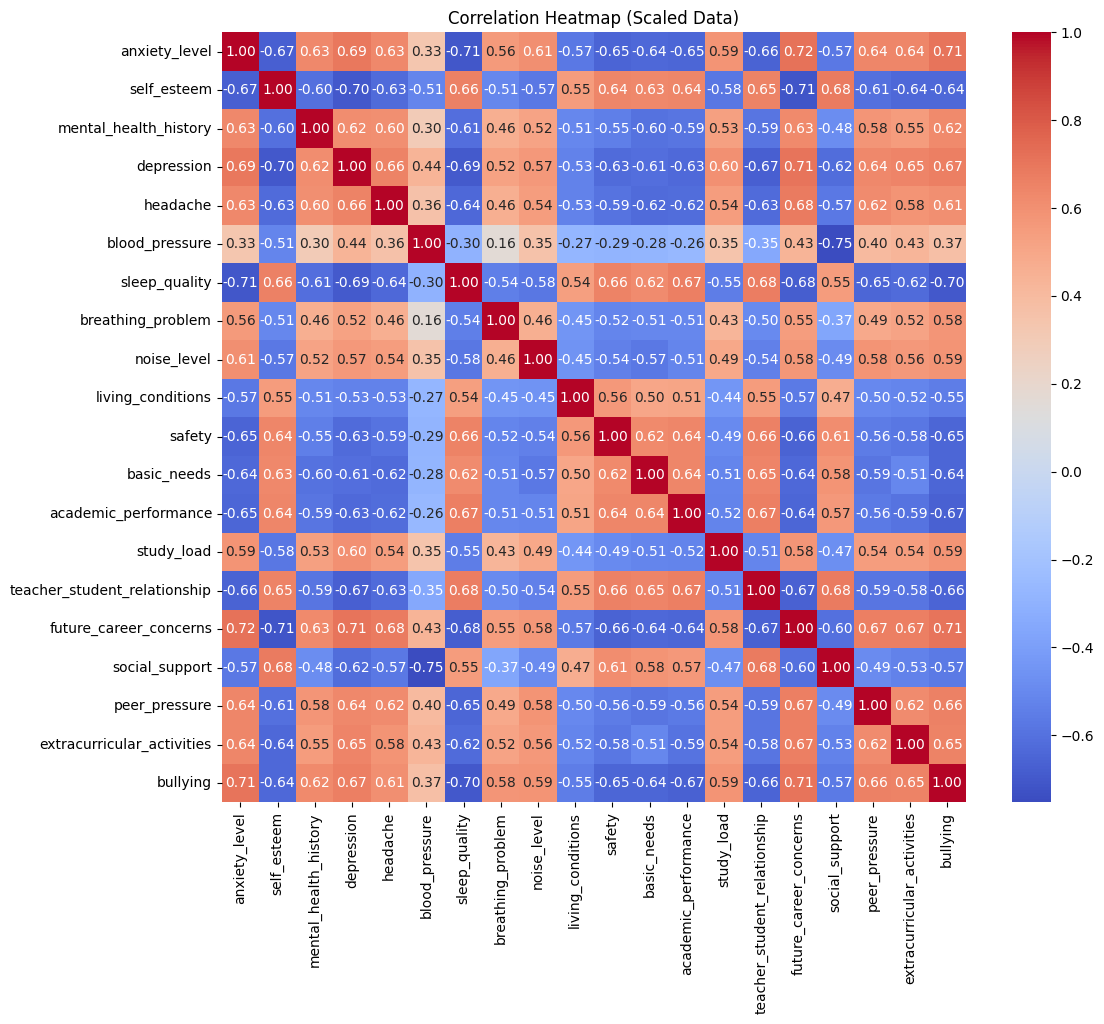

In [28]:
# Calculate correlations on the scaled dataset
scaled_correlation_matrix = X_scaled_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(scaled_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Scaled Data)')
plt.show()


The strongest correlation is between physical health factors (headache, blood pressure, and breathing problems) and stress levels.
The weakest correlation is between behavioral factors (extracurricular activities and bullying) and stress levels.

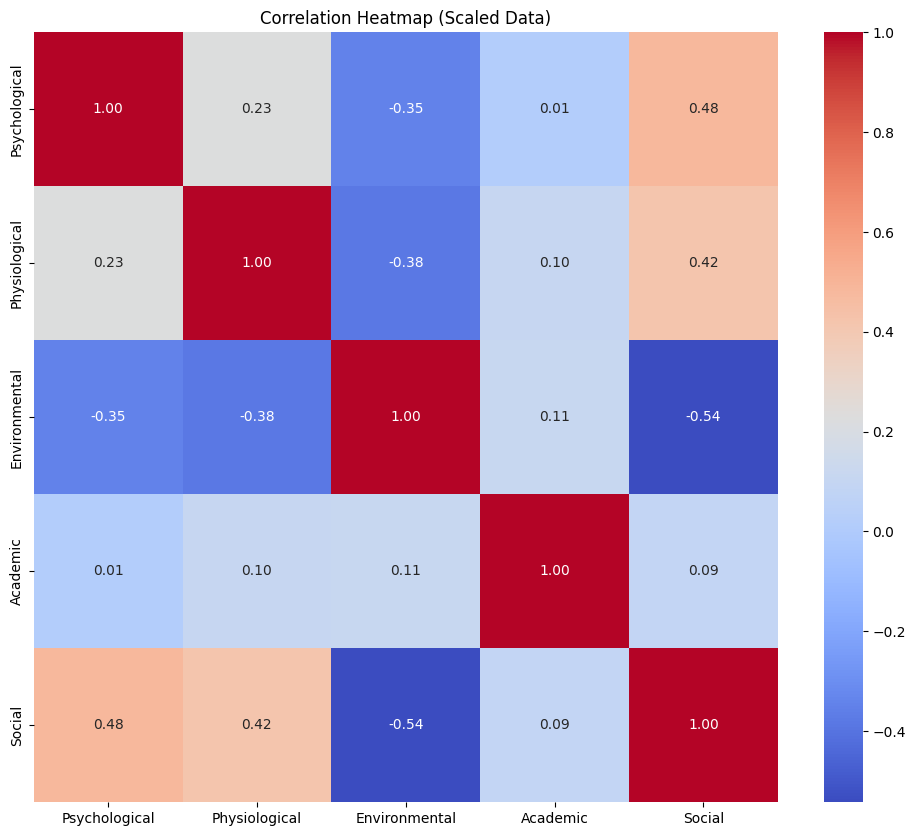

In [42]:
# Calculate correlations on the scaled dataset
factors_scaled_correlation_matrix = factors_scaled.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(factors_scaled_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Scaled Data)')
plt.show()


the following factors are positively correlated with student stress levels:

Physical health factors: headache, blood pressure, and breathing problems
Academic factors: academic performance and study load
Social factors: social support and peer pressure
Environmental factors: noise level, living conditions, and safety
This suggests that students who experience these factors are more likely to report high levels of stress.

I can also infer that the following factors are negatively correlated with student stress levels:

Psychological factors: anxiety level and self-esteem
Behavioral factors: extracurricular activities and bullying
This suggests that students who have high levels of anxiety and low self-esteem are more likely to report high levels of stress. Additionally, students who participate in extracurricular activities and are not bullied are more likely to report lower levels of stress.

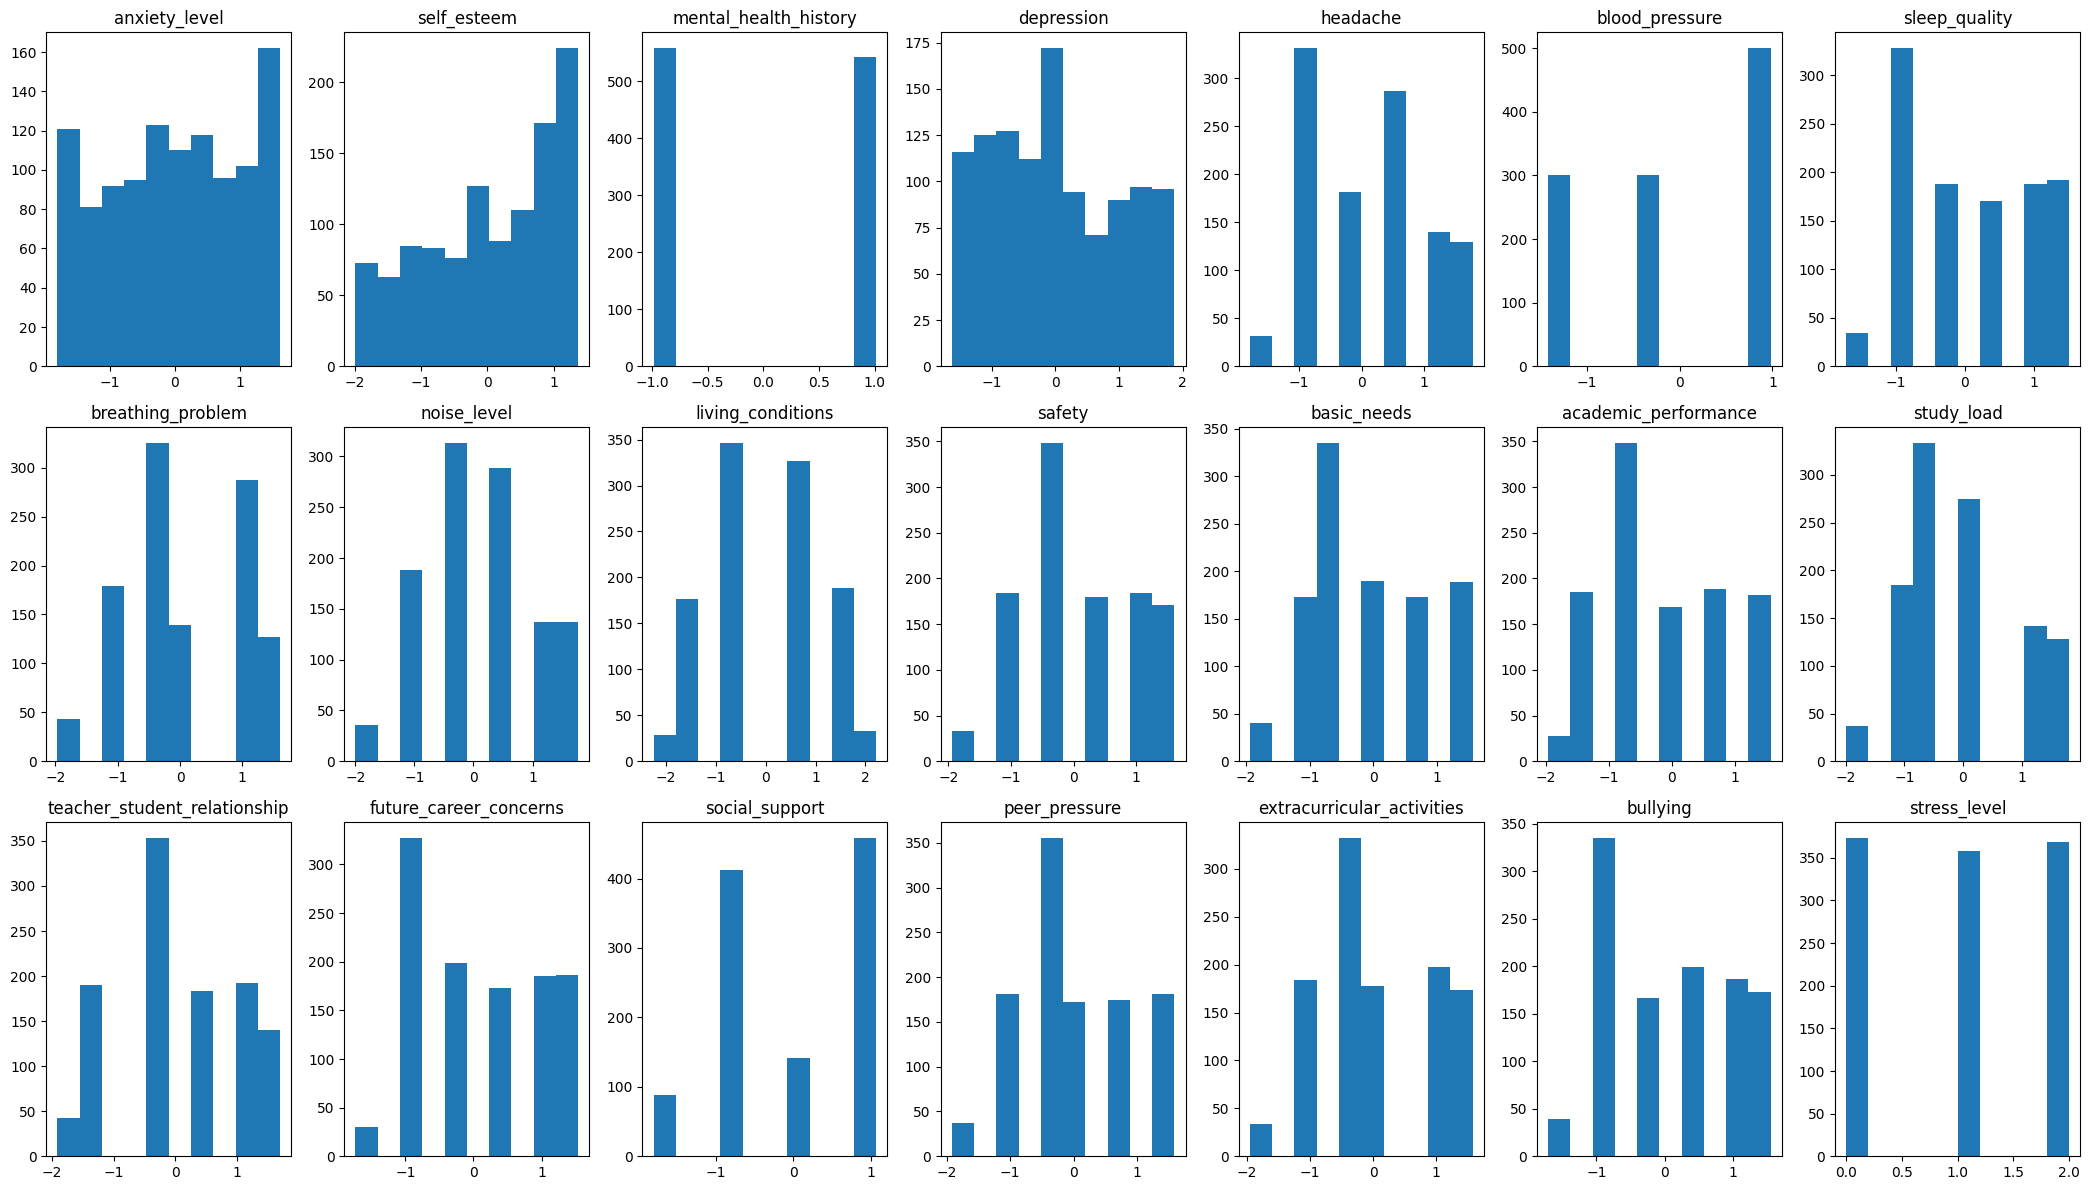

In [29]:
fig, axs = plt.subplots(3, 7, figsize=(21, 12))

column_names = scaled_df.columns.tolist()
for i, ax in enumerate(axs.flatten()):
    if i < len(column_names):
        ax.hist(scaled_df[column_names[i]])
        ax.set_title(column_names[i])

plt.tight_layout()

plt.show()

# Model Building 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [43]:
scaled_df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and testing sets
X = scaled_df[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
               'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
               'noise_level', 'living_conditions', 'safety', 'basic_needs',
               'academic_performance', 'study_load', 'teacher_student_relationship',
               'future_career_concerns', 'social_support', 'peer_pressure',
               'extracurricular_activities', 'bullying']]
y = scaled_df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [54]:
model2 = SVR()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# Performance Metrics

In [63]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [64]:

mae_1 = mean_absolute_error(y_test, y_pred1)
print("Mean absolute error for linear regression:", mae_1)

mse_1 = mean_squared_error(y_test, y_pred1)
print("Mean squared error for linear regression:", mse_1)

# Evaluate the model's performance using R-squared
r2_1 = r2_score(y_test, y_pred1)
print("R-squared for linear regression:", r2_1)


Mean absolute error for linear regression: 0.19803228048674407
Mean squared error for linear regression: 0.14076890911662004
R-squared for linear regression: 0.7891624570247745


In [65]:
mae_2 = mean_absolute_error(y_test, y_pred2)
print("Mean absolute error for SVM:", mae_2)

mse_2 = mean_squared_error(y_test, y_pred2)
print("Mean squared error for SVM:", mse_2)

# Evaluate the model's performance using R-squared
r2_2 = r2_score(y_test, y_pred2)
print("R-squared for SVM:", r2_2)

Mean absolute error for SVM: 0.18292136960397054
Mean squared error for SVM: 0.16212060202253745
R-squared for SVM: 0.7571828210462382


While the linear regression model has a slightly higher R-squared value (0.7891 vs. 0.7572 for SVM), the mean absolute error (MAE) for SVM (0.1829) is marginally lower than that of linear regression (0.1980). This suggests that both models capture the overall trend in student stress levels reasonably well, but SVM may slightly outperform linear regression in terms of individual prediction accuracy.